# Consigna: Práctica 1 Ejercicio 6

### Problema del Agente Viajero (TSP) con múltiples objetivos

Considere el **Problema del Agente Viajero (TSP)** del ejercicio 4. Considere ahora que **cada ruta tiene un valor de tiempo asociado** debido al tráfico o estado de la ruta.

Implemente un **MOGA** que retorne las **mejores soluciones (frente de Pareto)**.

# Resolución

En este ejercicio abordamos el Problema del Agente Viajero (TSP) en su versión multi-objetivo: además de minimizar la distancia total recorrida, también hay que minimizar el tiempo. Para resolverlo implementamos un **MOGA (Multi-Objective Genetic Algorithm)** usando la biblioteca **DEAP** en Python y obtenemos un frente de Pareto de soluciones no dominadas.

La representación elegida es una permutación de enteros donde cada valor representa una ciudad, esto garantiza rutas válidas. La función de aptitud devuelve dos objetivos a minimizar: `(distancia_total, tiempo_total)`.

El algoritmo devuelve el **Frente de Pareto** (lista de soluciones no dominadas).

In [1]:
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Constantes del problema
CANTIDAD_CIUDADES = 10
POBLACION_INICIAL = 100
N_GENERACIONES = 100
PROB_CRUCE = 0.9
PROB_MUTACION = 0.1
PROB_INTERCAMBIO = 0.2  # probabilidad de intercambio en mutacion

# Distancias entre cada par de ciudades
distancias = [
    [0, 29, 20, 21, 16, 31, 100, 12, 4, 31],
    [29, 0, 15, 29, 28, 40, 72, 21, 29, 41],
    [20, 15, 0, 15, 14, 25, 81, 9, 23, 27],
    [21, 29, 15, 0, 4, 12, 92, 12, 25, 13],
    [16, 28, 14, 4, 0, 16, 94, 9, 20, 16],
    [31, 40, 25, 12, 16, 0, 95, 24, 36, 3],
    [100, 72, 81, 92, 94, 95, 0, 90, 101, 99],
    [12, 21, 9, 12, 9, 24, 90, 0, 15, 25],
    [4, 29, 23, 25, 20, 36, 101, 15, 0, 35],
    [31, 41, 27, 13, 16, 3, 99, 25, 35, 0]
]

# Tiempos entre cada par de ciudades
tiempos = [
    [0, 40, 22, 25, 18, 33, 120, 20, 10, 45],
    [40, 0, 30, 35, 33, 55, 95, 26, 38, 58],
    [22, 30, 0, 28, 24, 30, 105, 15, 32, 36],
    [25, 35, 28, 0, 10, 20, 115, 18, 27, 22],
    [18, 33, 24, 10, 0, 18, 110, 15, 25, 20],
    [33, 55, 30, 20, 18, 0, 115, 28, 45, 5],
    [120, 95, 105, 115, 110, 115, 0, 100, 120, 115],
    [20, 26, 15, 18, 15, 28, 100, 0, 20, 30],
    [10, 38, 32, 27, 25, 45, 120, 20, 0, 40],
    [45, 58, 36, 22, 20, 5, 115, 30, 40, 0]
]

In [2]:
# Configuraciones para DEAP

# Fitness con dos objetivos a minimizar: distancia y tiempo
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))

# Cada individuo representa una ruta (una permutacion de las ciudades)
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Un individuo se genera como una permutación de las ciudades
toolbox.register("individual",
                 tools.initIterate,
                 creator.Individual,
                 lambda: random.sample(range(CANTIDAD_CIUDADES), CANTIDAD_CIUDADES))

# Una poblacion es una lista de individuos
toolbox.register("population",
                 tools.initRepeat,
                 list,
                 toolbox.individual)

In [3]:
# Funcion de evaluacion: 
# Devuelve: (distancia, tiempo) de un individuo (ruta)
def agente_viajero(individual):
    dist = 0
    time = 0
    for i in range(len(individual) - 1):
        dist += distancias[individual[i]][individual[i+1]]
        time += tiempos[individual[i]][individual[i+1]]
    # para volver al origen
    dist += distancias[individual[-1]][individual[0]]
    time += tiempos[individual[-1]][individual[0]]
    return (dist, time)
toolbox.register("evaluate", agente_viajero)

In [4]:
# Operadores geneticos

# Cruce PMX, hace un crossover pero se asegura
# que los hijos sean permutaciones validas
# toolbox.register("mate", tools.cxPartialyMatched)

# Cruce Ordered, copia una parte del padre en la misma posicion
# en el hijo. Tambien mantiene permutaciones validas
# Da una solucion mas que la cxPartialyMatched.
toolbox.register("mate", tools.cxOrdered)


# Mutacion por intercambio, intercambio la posicion
# manteniendo la permutacion valida
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=PROB_INTERCAMBIO)

# Seleccion torneo
toolbox.register("select", tools.selNSGA2)

In [5]:
def plot_pareto_front(hof):
    distancias_pareto = [ind.fitness.values[0] for ind in hof]
    costos_pareto = [ind.fitness.values[1] for ind in hof]

    plt.figure(figsize=(8, 6))
    plt.scatter(distancias_pareto, costos_pareto, marker='o', color='green')
    plt.title('Frente de Pareto (Distancia vs. Costo)')
    plt.xlabel('Distancia Total')
    plt.ylabel('Costo Total')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.show()

Frente de Pareto:
Solución 1: [9, 3, 4, 0, 8, 7, 2, 1, 6, 5]
Distancia: 246.00 | Tiempo: 340.00

Solución 2: [6, 1, 2, 7, 8, 0, 4, 3, 9, 5]
Distancia: 246.00 | Tiempo: 340.00

Solución 3: [5, 9, 3, 4, 0, 8, 7, 2, 1, 6]
Distancia: 246.00 | Tiempo: 340.00

Solución 4: [5, 6, 1, 2, 7, 8, 0, 4, 3, 9]
Distancia: 246.00 | Tiempo: 340.00

Solución 5: [8, 0, 4, 3, 9, 5, 6, 1, 2, 7]
Distancia: 246.00 | Tiempo: 340.00

Solución 6: [8, 0, 4, 3, 5, 9, 6, 1, 2, 7]
Distancia: 249.00 | Tiempo: 338.00

Solución 7: [6, 1, 2, 7, 8, 0, 4, 3, 5, 9]
Distancia: 249.00 | Tiempo: 338.00

Solución 8: [3, 4, 0, 8, 7, 2, 1, 6, 9, 5]
Distancia: 249.00 | Tiempo: 338.00

Solución 9: [9, 6, 1, 2, 7, 8, 0, 4, 3, 5]
Distancia: 249.00 | Tiempo: 338.00

Solución 10: [5, 3, 4, 0, 8, 7, 2, 1, 6, 9]
Distancia: 249.00 | Tiempo: 338.00

Solución 11: [9, 5, 3, 4, 0, 8, 7, 2, 1, 6]
Distancia: 249.00 | Tiempo: 338.00



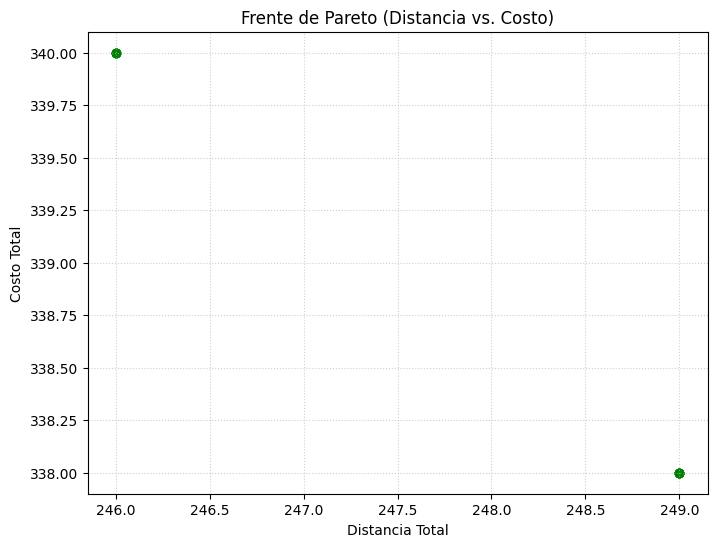

In [6]:
random.seed(42)
poblacion = toolbox.population(n=POBLACION_INICIAL) # Población inicial
paretoFront = tools.ParetoFront()
algorithms.eaMuPlusLambda(poblacion,
                          toolbox,
                          mu=POBLACION_INICIAL,
                          lambda_=POBLACION_INICIAL,
                          cxpb=PROB_CRUCE,
                          mutpb=PROB_MUTACION,
                          ngen=N_GENERACIONES,
                          halloffame=paretoFront,
                          verbose=False)

print("Frente de Pareto:")
for i, ind in enumerate(paretoFront):
    print(f"Solución {i+1}: {ind}")
    print(f"Distancia: {ind.fitness.values[0]:.2f} | Tiempo: {ind.fitness.values[1]:.2f}\n")

plot_pareto_front(paretoFront)

# Conclusión

El MOGA logró encontrar un pequeño frente de Pareto con rutas muy parecidas, lo que muestra que hay poca diferencia entre optimizar distancia o tiempo con los datos actuales. Aun así, el algoritmo funciona bien y muestra el equilibrio entre ambos objetivos. Con matrices más variadas o más generaciones, se podrían obtener más soluciones distintas. No existe una única ruta "mejor", sino que la elección de la solución óptima depende de la prioridad que se le quiera dar a la distancia frente al tiempo (o viceversa).